<a href="https://colab.research.google.com/github/Wongini/Colab/blob/main/First_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib as plt


In [57]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Binance Data/spot/monthly/klines/BTCUSDT/1m/BTCUSDT-1m-2017-08.csv')

new_columns = [
    "open_timestamp",
    "open",
    "high",
    "low",
    "close",
    "volume",
    "close_timestamp",
    "quote_asset_volume",
    "number_of_trades",
    "taker_buy_base_asset_volume",
    "taker_buy_quote_assset_volume",
    "ignore"
]

df.columns = new_columns

In [58]:
df['change'] = (df.close / df.open)

df.drop(df[df["volume"] == 0].index, inplace=True)

for i in range(1,30+1):
    df[f'change_{i}'] = (df.open/df.open.shift(i))
    df[f'volume_{i}'] = (df.volume/df.volume.shift(i))
    df[f'change_{i}'] = (df[f'change_{i}']-df[f'change_{i}'].mean())/df[f'change_{i}'].std()
    df[f'volume_{i}'] = (df[f'volume_{i}']-df[f'volume_{i}'].mean())/df[f'volume_{i}'].std()

df['changeBool'] = df['change'].apply(lambda x: 1 if x > 1 else 0)

df.dropna(inplace=True)
df.drop(columns=new_columns, inplace=True)
df.head()

,change,change_1,volume_1,change_2,volume_2,change_3,volume_3,change_4,volume_4,change_5,...,volume_26,change_27,volume_27,change_28,volume_28,change_29,volume_29,change_30,volume_30,changeBool
49,1.004208,-1.058107,-0.047959,-0.949608,-0.035386,-0.890546,-0.033488,-0.841778,-0.077088,-0.795095,...,-0.060162,0.760488,0.013169,0.749615,-0.024524,0.736611,0.502564,0.254879,-0.041342,1
50,1.002843,0.546222,-0.051104,-0.459151,-0.061387,-0.431485,-0.038421,-0.408696,-0.074616,-0.386840,...,-0.077794,1.001378,-0.064030,0.987305,-0.027986,0.970430,-0.049289,0.954445,0.122785,1
51,0.999998,0.711164,-0.037607,1.128866,-0.055619,0.166566,-0.040664,0.155510,-0.021232,0.145023,...,-0.064641,1.226888,-0.064732,1.296962,-0.042412,1.275042,0.074425,1.254283,-0.007494,0
52,0.999998,-0.003713,-0.052113,0.634946,-0.059401,1.054877,-0.044793,0.155510,-0.087577,0.145023,...,-0.072490,1.226888,-0.068274,1.209821,-0.062976,1.275042,-0.065712,1.254283,-0.031775,0
53,1.000000,-0.004297,-0.050682,-0.005819,-0.063568,0.592085,-0.044553,0.993087,-0.089685,0.144588,...,-0.075186,1.190049,-0.068123,1.209568,-0.062955,1.189072,-0.072128,1.254038,-0.055525,0


In [59]:
target = 'changeBool'

X = df.drop(columns=target).values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(8).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(8).prefetch(tf.data.AUTOTUNE)

In [60]:
input_layer = Input(shape=(X.shape[1],))
hidden1 = Dense(512, activation="relu")(input_layer)
hidden2 = Dense(512, activation="relu")(hidden1)
hidden3 = Dense(256, activation="relu")(hidden2)
hidden3 = Dense(128, activation="relu")(hidden2)
output_layer = Dense(1, activation="sigmoid")(hidden3)
model = keras.Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 61)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 512)                 │          31,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 360,193 (1.37 MB)

 Trainable params: 360,193 (1.37 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.fit(train_dataset, epochs=15, validation_data=test_dataset)

Epoch 1/15
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8419 - loss: 0.4592 - val_accuracy: 0.8422 - val_loss: 0.4181
Epoch 2/15
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8438 - loss: 0.4095 - val_accuracy: 0.8394 - val_loss: 0.4204
Epoch 3/15
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8434 - loss: 0.4033 - val_accuracy: 0.8408 - val_loss: 0.4212
Epoch 4/15
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8440 - loss: 0.3985 - val_accuracy: 0.8415 - val_loss: 0.4124
Epoch 5/15
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8435 - loss: 0.3942 - val_accuracy: 0.8422 - val_loss: 0.4138
Epoch 6/15
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8470 - loss: 0.3884 - val_accuracy: 0.8412 - val_loss: 0.4241
Epoch 7/15
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8516 - loss: 0.3835 - val_accuracy: 0.8405 - val_loss: 0.4240
Epoch 8/15
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8561 - loss: 0.3727 -

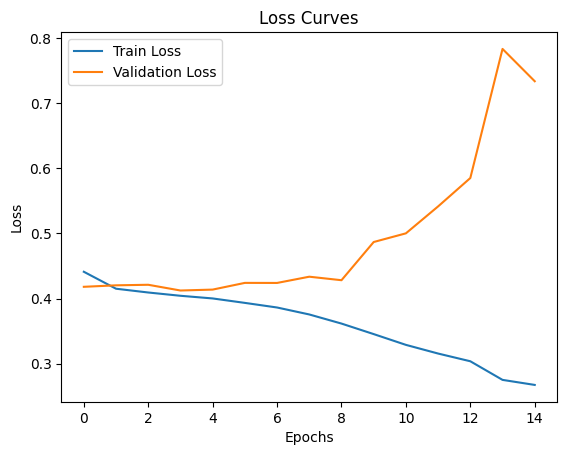

In [64]:
plt.plot(model.history.history['loss'], label="Train Loss")
plt.plot(model.history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curves")
plt.show()

#overfitting so bad lol